<a href="https://colab.research.google.com/github/cycerow/Balanco-Energia-ONS/blob/main/Analise_de_Oferta_de_Energia_Solar_no_Nordeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0.Preparção do Ambiente**

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Desativar todos os warnings
warnings.filterwarnings("ignore")


In [2]:
!git clone https://github.com/cycerow/Balanco-Energia-ONS.git


Cloning into 'Balanco-Energia-ONS'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 12.38 MiB | 8.37 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [6]:
%cd Balanco-Energia-ONS/database

#Coleta dos dados
df_20 = pd.read_excel('/content/Balanco-Energia-ONS/database/BALANCO_ENERGIA_SUBSISTEMA_2020.xlsx')
df_21 = pd.read_excel('/content/Balanco-Energia-ONS/database/BALANCO_ENERGIA_SUBSISTEMA_2021.xlsx')
df_22 = pd.read_excel('/content/Balanco-Energia-ONS/database/BALANCO_ENERGIA_SUBSISTEMA_2022.xlsx')
df_23 = pd.read_excel('/content/Balanco-Energia-ONS/database/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx')
df_24 = pd.read_excel('/content/Balanco-Energia-ONS/database/BALANCO_ENERGIA_SUBSISTEMA_2024.xlsx')

[Errno 2] No such file or directory: 'Balanco-Energia-ONS/database'
/content/Balanco-Energia-ONS/database


#**1.Coleta dos Dados**

**Juntar as bases em um unico dataset**

In [7]:
# Concatenar os DataFrames
df = pd.concat([df_20, df_21, df_22, df_23])

# Resetar o índice, se necessário
df = df.reset_index(drop=True)

# # Verificar as dimensões do DataFrame combinado
# print(df.shape)
# print(df.head())

In [8]:
# 1. Filtrar a região 'NORDESTE' para 'df_nordeste'
df_nordeste = df[df['nom_subsistema'].str.contains('NORDESTE')].copy()

# 2. Remover a coluna 'nom_subsistema' do 'df_nordeste'
df_nordeste = df_nordeste.drop(columns=['nom_subsistema'])

# 3. Renomear a coluna 'val_carga' para 'total_demanda' no 'df_nordeste'
df_nordeste = df_nordeste.rename(columns={'val_carga': 'total_demanda'})

# 4. Criar uma nova coluna 'total_oferta', que é a soma das gerações do 'df_nordeste'
df_nordeste['total_oferta'] = df_nordeste[['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar']].sum(axis=1)

# Exibir as primeiras linhas do 'df_nordeste' para verificar o resultado
df_nordeste.head()


,id_subsistena,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,total_demanda,val_intercambio,total_oferta
0,NE,2020-01-01 00:00:00,2226.540,2161.195,1852.164,0.0,9617.975,-3378.076,6239.899
5,NE,2020-01-01 01:00:00,2574.696,2164.202,1520.246,0.0,9628.517,-3369.373,6259.144
10,NE,2020-01-01 02:00:00,2853.105,2164.236,1015.391,0.0,9652.756,-3620.024,6032.732
15,NE,2020-01-01 03:00:00,3142.608,2128.611,870.651,0.0,9600.859,-3458.989,6141.870
20,NE,2020-01-01 04:00:00,3188.679,2127.904,789.906,0.0,9496.766,-3390.277,6106.489


# **2. Análise dos dados**


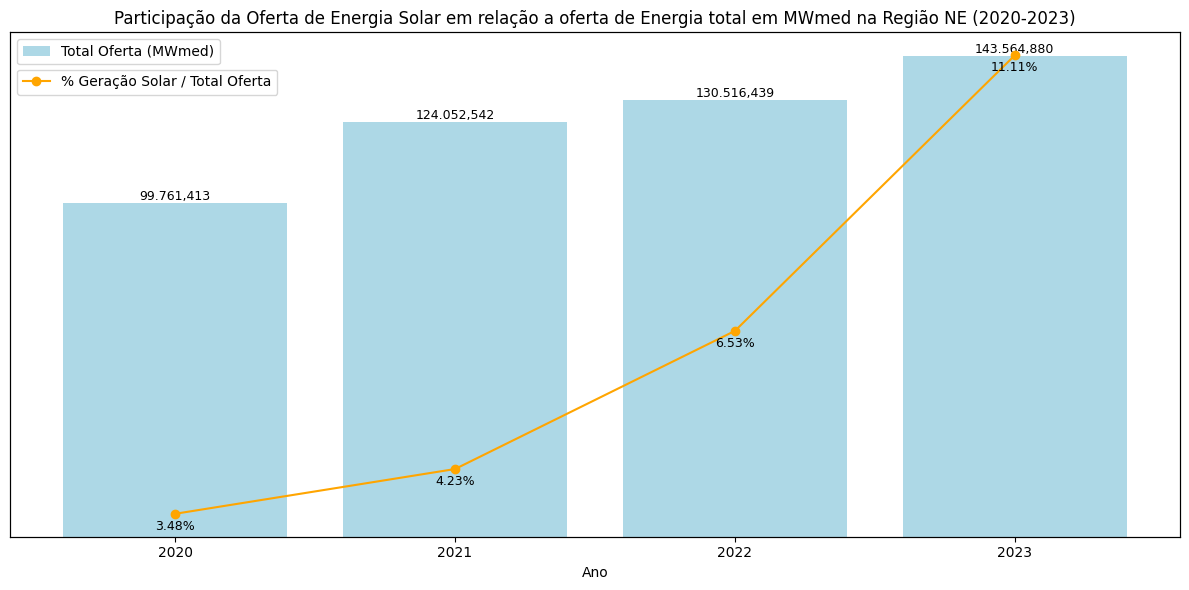

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Adicionar uma coluna de ano ao DataFrame df_nordeste
df_nordeste['ano'] = df_nordeste['din_instante'].dt.year

# Filtrar os anos desejados
anos_desejados = [2020, 2021, 2022, 2023]

# Filtrar o DataFrame para os anos desejados
df_nordeste_filtrado = df_nordeste[df_nordeste['ano'].isin(anos_desejados)]

# Calcular o total anual para total_oferta e val_gersolar
df_agrupado = df_nordeste_filtrado.groupby('ano').agg({
    'total_oferta': 'sum',
    'val_gersolar': 'sum'
}).reset_index()

# Calcular o percentual da geração solar em relação ao total de oferta
df_agrupado['percentual_solar_oferta'] = (df_agrupado['val_gersolar'] / df_agrupado['total_oferta']) * 100

# Configuração do gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para total_oferta em MWmed
ax1.bar(df_agrupado['ano'], df_agrupado['total_oferta'], color='lightblue', label='Total Oferta (MWmed)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('')
ax1.set_title('Participação da Oferta de Energia Solar em relação a oferta de Energia total em MWmed na Região NE (2020-2023)')

# Remover os valores das ordenadas
ax1.yaxis.set_ticks([])

# Definir os ticks do eixo x para exibir apenas os anos completos
ax1.set_xticks([2020, 2021, 2022, 2023])

# Adiciona rótulos de valor nas barras com o formato XXX.XXX,XXX
for i in range(len(df_agrupado)):
    valor = df_agrupado['total_oferta'][i]
    formatted_value = f"{valor:,.0f}".replace(".", ",").replace(",", ".", 1)
    ax1.text(df_agrupado['ano'][i], df_agrupado['total_oferta'][i] + 100, formatted_value,
             ha='center', va='bottom', fontsize=9)

# Configurações do segundo eixo para o percentual da geração solar
ax2 = ax1.twinx()
ax2.plot(df_agrupado['ano'], df_agrupado['percentual_solar_oferta'], marker='o', color='orange', label='% Geração Solar / Total Oferta')
ax2.set_ylabel('')

# Remover os valores das ordenadas
ax2.yaxis.set_ticks([])

# Adiciona percentuais logo abaixo dos pontos
for i in range(len(df_agrupado)):
    ax2.text(df_agrupado['ano'][i], df_agrupado['percentual_solar_oferta'][i] - 0.1, f"{df_agrupado['percentual_solar_oferta'][i]:.2f}%",
             ha='center', va='top', fontsize=9)

# Ajustar a posição das legendas no lado esquerdo, uma abaixo da outra
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.94))

# Exibir o gráfico
plt.tight_layout()
plt.show()


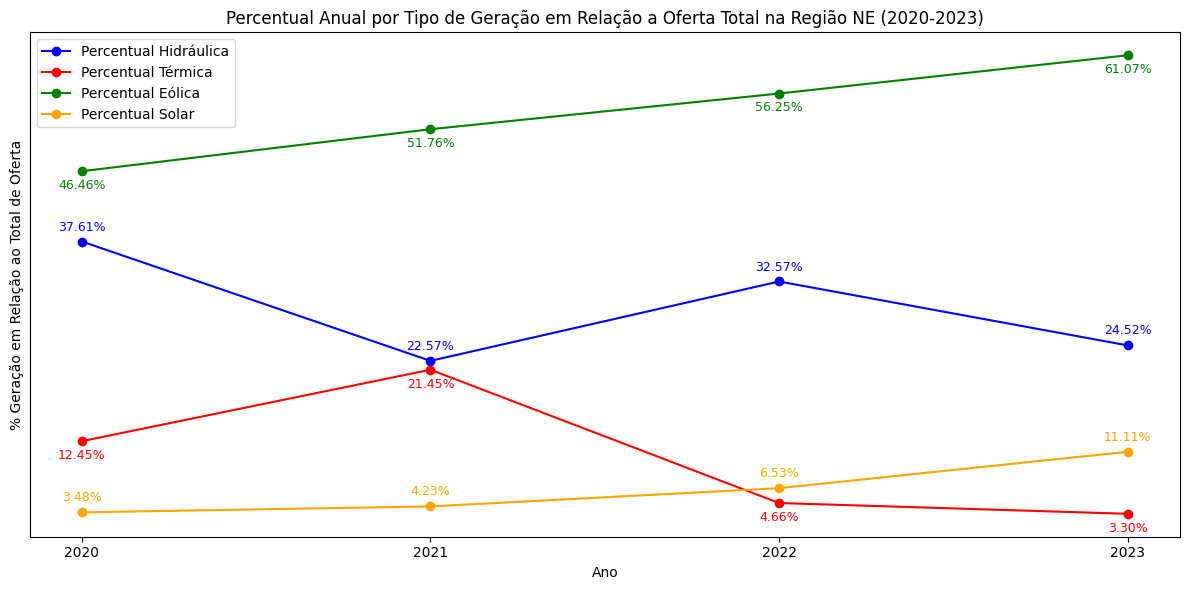

In [10]:
# Adicionar uma coluna de ano ao DataFrame df_nordeste
df_nordeste['ano'] = df_nordeste['din_instante'].dt.year

# Filtrar os anos desejados
anos_desejados = [2020, 2021, 2022, 2023]

# Filtrar o DataFrame para os anos desejados
df_nordeste_filtrado = df_nordeste[df_nordeste['ano'].isin(anos_desejados)]

# Calcular o total anual para total_oferta e cada tipo de geração
df_agrupado = df_nordeste_filtrado.groupby('ano').agg({
    'total_oferta': 'sum',
    'val_gerhidraulica': 'sum',
    'val_gertermica': 'sum',
    'val_gereolica': 'sum',
    'val_gersolar': 'sum'
}).reset_index()

# Calcular os percentuais para cada tipo de geração em relação ao total de oferta
df_agrupado['percentual_gerhidraulica'] = (df_agrupado['val_gerhidraulica'] / df_agrupado['total_oferta']) * 100
df_agrupado['percentual_gertermica'] = (df_agrupado['val_gertermica'] / df_agrupado['total_oferta']) * 100
df_agrupado['percentual_gereolica'] = (df_agrupado['val_gereolica'] / df_agrupado['total_oferta']) * 100
df_agrupado['percentual_gersolar'] = (df_agrupado['val_gersolar'] / df_agrupado['total_oferta']) * 100

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Plotar linhas para cada percentual
plt.plot(df_agrupado['ano'], df_agrupado['percentual_gerhidraulica'], marker='o', color='blue', label='Percentual Hidráulica')
plt.plot(df_agrupado['ano'], df_agrupado['percentual_gertermica'], marker='o', color='red', label='Percentual Térmica')
plt.plot(df_agrupado['ano'], df_agrupado['percentual_gereolica'], marker='o', color='green', label='Percentual Eólica')
plt.plot(df_agrupado['ano'], df_agrupado['percentual_gersolar'], marker='o', color='orange', label='Percentual Solar')

# Adicionar rótulos de percentual nos pontos
for i in range(len(df_agrupado)):
    plt.text(df_agrupado['ano'][i], df_agrupado['percentual_gerhidraulica'][i] + 1, f"{df_agrupado['percentual_gerhidraulica'][i]:.2f}%",
             ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(df_agrupado['ano'][i], df_agrupado['percentual_gertermica'][i] - 1, f"{df_agrupado['percentual_gertermica'][i]:.2f}%",
             ha='center', va='top', fontsize=9, color='red')
    plt.text(df_agrupado['ano'][i], df_agrupado['percentual_gereolica'][i] - 1, f"{df_agrupado['percentual_gereolica'][i]:.2f}%",
             ha='center', va='top', fontsize=9, color='green')
    plt.text(df_agrupado['ano'][i], df_agrupado['percentual_gersolar'][i] + 1, f"{df_agrupado['percentual_gersolar'][i]:.2f}%",
             ha='center', va='bottom', fontsize=9, color='orange')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('% Geração em Relação ao Total de Oferta')
plt.title('Percentual Anual por Tipo de Geração em Relação a Oferta Total na Região NE (2020-2023)')
plt.xticks([2020, 2021, 2022, 2023])

# Remover os valores das ordenadas
plt.yticks([])

# Adicionar a legenda
plt.legend(loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()

